In [1]:
import numpy as np  # this module handles arrays, but here we need it for its NaN value
import pandas as pd # this module contains a lot of tools for handling tabular data
from matplotlib import pyplot as plt
from salishsea_tools import evaltools as et
import datetime as dt
import os
import gsw
import pickle
import netCDF4 as nc
import cmocean
from scipy import stats as spst
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
modSourceDir= '/results/SalishSea/nowcast-green.201812/'
modver='201812'
Chl_N=1.8 # Chl:N ratio
fname='compHPLCModelFirstLook-Regress-Base.ipynb'
startYMD=(2015,1,1)
endYMD=(2018,12,31)

In [3]:
# Parameters
modSourceDir = "/results/SalishSea/nowcast-green.201812/"
modver = "201812"
Chl_N = 1.8
fname = "compHPLCModelFirstLook-Regress-201812.ipynb"


In [4]:
start_date = dt.datetime(startYMD[0],startYMD[1],startYMD[2])
end_date = dt.datetime(endYMD[0],endYMD[1],endYMD[2]) #dt.datetime(2019,6,30)

In [5]:
datestr='_'+start_date.strftime('%Y%m%d')+'_'+end_date.strftime('%Y%m%d')

In [6]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=np.copy(mesh.variables['tmask'][0,:,:,:])
    navlat=np.copy(mesh.variables['nav_lat'][:,:])
    navlon=np.copy(mesh.variables['nav_lon'][:,:])

In [7]:
def subval(idf,colList):
    # first value in colList should be the column you are going to keep
    # follow with other columns that will be used to fill in when that column is NaN
    # in order of precedence
    if len(colList)==2:
        idf[colList[0]]=[r[colList[0]] if not pd.isna(r[colList[0]]) \
                         else  r[colList[1]] for i,r in idf.iterrows()]
    elif len(colList)==3:
        idf[colList[0]]=[r[colList[0]] if not pd.isna(r[colList[0]]) \
                         else  r[colList[1]] if not pd.isna(r[colList[1]]) \
                         else r[colList[2]] for i,r in idf.iterrows()]
    else:
        raise NotImplementedError('Add to code to handle this case')
    idf.drop(columns=list(colList[1:]),inplace=True)
    return idf

In [8]:

    data=pickle.load(open( 'matched_'+modver+datestr+'.pkl', 'rb' ) )


In [9]:
data['other']=0.0
for el in ('Cryptophytes', 'Cyanobacteria', 'Dictyochophytes', 'Dinoflagellates',
    'Haptophytes', 'Prasinophytes', 'Raphidophytes'):
    data['other']=data['other']+data[el]

(0.0, 8.0)

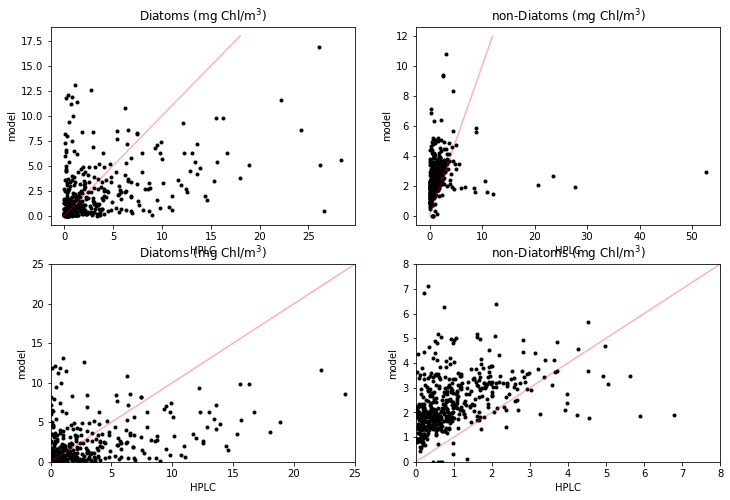

In [10]:
fig,ax=plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
ax[0].plot(data['Diatoms-1']+data['Diatoms-2'],Chl_N*data['mod_diatoms'],'k.')
ax[0].set_title('Diatoms (mg Chl/m$^3$)')
ax[0].set_xlabel('HPLC')
ax[0].set_ylabel('model')
ax[0].plot((0,18),(0,18),'r-',alpha=.3)

ax[1].plot(data['other'],Chl_N*(data['mod_flagellates']+data['mod_ciliates']),'k.')
ax[1].set_title('non-Diatoms (mg Chl/m$^3$)')
ax[1].set_xlabel('HPLC')
ax[1].set_ylabel('model')
ax[1].plot((0,12),(0,12),'r-',alpha=.3)

ax[2].plot(data['Diatoms-1']+data['Diatoms-2'],Chl_N*data['mod_diatoms'],'k.')
ax[2].set_title('Diatoms (mg Chl/m$^3$)')
ax[2].set_xlabel('HPLC')
ax[2].set_ylabel('model')
ax[2].plot((0,25),(0,25),'r-',alpha=.3)
ax[2].set_xlim((0,25))
ax[2].set_ylim((0,25))

ax[3].plot(data['other'],Chl_N*(data['mod_flagellates']+data['mod_ciliates']),'k.')
ax[3].set_title('non-Diatoms (mg Chl/m$^3$)')
ax[3].set_xlabel('HPLC')
ax[3].set_ylabel('model')
ax[3].plot((0,12),(0,12),'r-',alpha=.3)
ax[3].set_xlim((0,8))
ax[3].set_ylim((0,8))

In [11]:
def logt(x):
    return np.log10(x+.001)

(-3.1, 2.0)

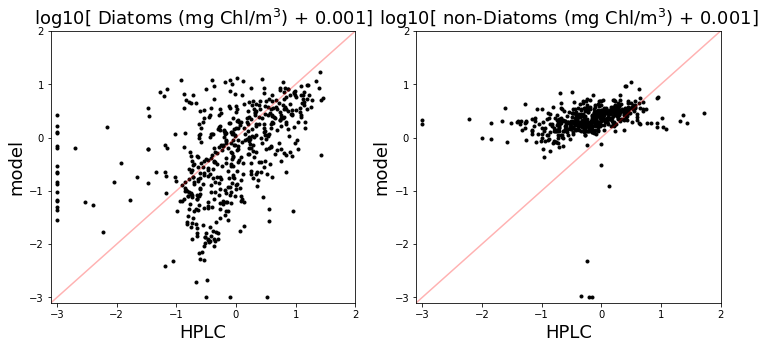

In [12]:
fig,ax=plt.subplots(1,2,figsize=(12,5))
ax[0].plot(logt(data['Diatoms-1']+data['Diatoms-2']),logt(Chl_N*data['mod_diatoms']),'k.')
ax[0].set_title('log10[ Diatoms (mg Chl/m$^3$) + 0.001]',fontsize=18)
ax[0].set_xlabel('HPLC',fontsize=18)
ax[0].set_ylabel('model',fontsize=18)
ax[0].set_xlim(-3.1,2)
ax[0].set_ylim(-3.1,2)
ax[0].plot((-6,3),(-6,3),'r-',alpha=.3)

ax[1].plot(logt(data['other']),logt(Chl_N*(data['mod_flagellates']+data['mod_ciliates'])),'k.')
ax[1].set_title('log10[ non-Diatoms (mg Chl/m$^3$) + 0.001]',fontsize=18)
ax[1].set_xlabel('HPLC',fontsize=18)
ax[1].set_ylabel('model',fontsize=18)
ax[1].plot((-6,3),(-6,3),'r-',alpha=.3)
ax[1].set_xlim(-3.1,2)
ax[1].set_ylim(-3.1,2)

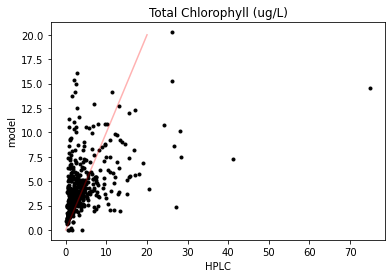

In [13]:
plt.plot(data['TchlA (ug/L)'],Chl_N*(data['mod_flagellates']+data['mod_ciliates']+data['mod_diatoms']),'k.')
plt.title('Total Chlorophyll (ug/L)')
plt.xlabel('HPLC')
plt.ylabel('model')
plt.plot((0,20),(0,20),'r-',alpha=.3)

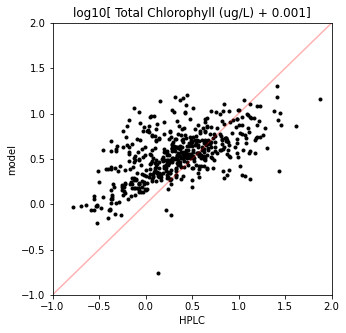

In [14]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.plot(logt(data['TchlA (ug/L)']),logt(Chl_N*(data['mod_flagellates']+data['mod_ciliates']+data['mod_diatoms'])),'k.')
ax.set_title('log10[ Total Chlorophyll (ug/L) + 0.001]')
ax.set_xlabel('HPLC')
ax.set_ylabel('model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1,2)
ax.set_ylim(-1,2);

In [15]:
def yd(idt):
    if type(idt)==dt.datetime:
        yd=(idt-dt.datetime(idt.year-1,12,31)).days
    else: # assume array or pandas
        yd=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in idt]
    return yd

data['yd']=yd(data['dtUTC'])
data['Year']=[ii.year for ii in data['dtUTC']]

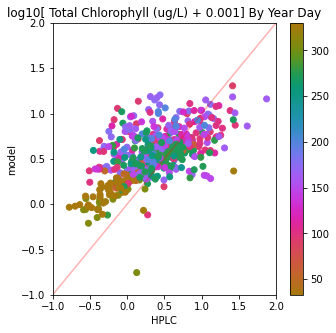

In [16]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
m=ax.scatter(logt(data['TchlA (ug/L)']),logt(Chl_N*(data['mod_flagellates']+data['mod_ciliates']+data['mod_diatoms'])),
          c=data['yd'],cmap=cmocean.cm.phase)
ax.set_title('log10[ Total Chlorophyll (ug/L) + 0.001] By Year Day')
ax.set_xlabel('HPLC')
ax.set_ylabel('model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
ax.set_xlim(-1,2)
ax.set_ylim(-1,2);
fig.colorbar(m)

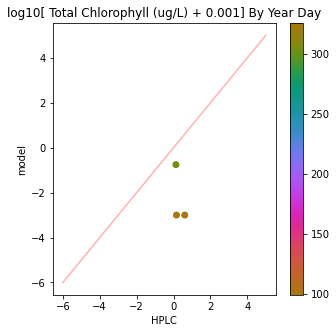

In [17]:
x=logt(data['TchlA (ug/L)'])
y=logt(Chl_N*(data['mod_flagellates']+data['mod_ciliates']+data['mod_diatoms']))
ii=data.loc[(y<-.5)&(x>0)].index

fig,ax=plt.subplots(1,1,figsize=(5,5))
m=ax.scatter(logt(data.loc[ii,['TchlA (ug/L)']].values),
             logt(Chl_N*(data.loc[ii,['mod_flagellates']].values+data.loc[ii,['mod_ciliates']].values+\
                         data.loc[ii,['mod_diatoms']].values)),
          c=data.loc[ii,['yd']].values,cmap=cmocean.cm.phase)
ax.set_title('log10[ Total Chlorophyll (ug/L) + 0.001] By Year Day')
ax.set_xlabel('HPLC')
ax.set_ylabel('model')
ax.plot((-6,5),(-6,5),'r-',alpha=.3)
#ax.set_xlim(-3,2)
#ax.set_ylim(-3,2);
fig.colorbar(m)

In [18]:
data.keys()

Index(['FIL:START TIME YYYY/MM/DD HH:MM:SS', 'LOC:STATION', 'Lat', 'Lon',
       'LOC:WATER DEPTH', 'Sample_Number', 'Temperature', 'Salinity',
       'Oxygen:Dissolved:CTD', 'pH:SBE:Nominal', 'Salinity:Bottle',
       'Flag:Salinity:Bottle', 'Flag:Chlorophyll:Extracted',
       'Flag:Nitrate_plus_Nitrite', 'Flag:Silicate', 'Flag:Phosphate',
       'Cruise', 'Oxygen:Dissolved', 'Flag:Oxygen:Dissolved', 'Cyanobacteria',
       'Prasinophytes', 'Cryptophytes', 'Diatoms-1', 'Diatoms-2',
       'Haptophytes', 'TchlA (ug/L)', 'Pressure [decibar]',
       'Transmissivity [*/metre]', 'PAR [uE/m^2/sec]',
       'PAR:Reference [uE/m^2/sec]', 'Oxygen:Dissolved:SBE [mL/L]',
       'Oxygen:Dissolved:SBE [umol/kg]', 'Chlorophyll:Extracted [mg/m^3]',
       'Phaeo-Pigment:Extracted [mg/m^3]', 'Nitrate_plus_Nitrite [umol/L]',
       'Silicate [umol/L]', 'Phosphate [umol/L]', 'Bottle_Number',
       'Oxygen:Dissolved [mL/L]', 'Oxygen:Dissolved [umol/kg]',
       'Depth [metres]', 'Fluorescence [mg/m^3

In [19]:
temp=data.loc[(y<-.5)&(data['Diatoms-1']>=0),['dtUTC','Sample_Number','i','j','k','p','FIL:START TIME YYYY/MM/DD HH:MM:SS','TchlA (ug/L)','Diatoms-1','mod_diatoms','mod_ciliates','mod_flagellates']].copy(deep=True)

In [20]:
temp['x']=logt(temp['TchlA (ug/L)'])
temp['y']=logt(Chl_N*(temp['mod_flagellates']+temp['mod_ciliates']+temp['mod_diatoms']))
temp

,dtUTC,Sample_Number,i,j,k,p,FIL:START TIME YYYY/MM/DD HH:MM:SS,TchlA (ug/L),Diatoms-1,mod_diatoms,mod_ciliates,mod_flagellates,x,y
2058,2016-10-31 08:52:26,39.0,7,413,1,1.700000,2016-10-31 08:52:26,0.649,0.062,1.653692e-03,3.868761e-04,1.689267e-03,-0.187087,-2.112737
2074,2016-10-31 18:41:19,54.0,31,394,1,1.700000,2016-10-31 18:41:19,1.344,0.003,2.968014e-02,1.752464e-02,4.992811e-02,0.128722,-0.754884
2325,2017-02-19 07:07:56,615.0,7,413,0,1.000000,2017-02-19 07:07:56,0.774,0.317,3.890813e-07,3.597786e-06,2.087190e-05,-0.110698,-2.980989
2539,2017-04-09 15:48:00,24.0,7,413,1,1.109361,2017-04-09 15:48:00,1.438,0.736,1.032806e-08,1.016448e-08,1.044351e-08,0.158061,-2.999976
5321,2018-11-22 18:37:56,37.0,8,413,2,2.600000,2018-11-22 18:37:56,4.033,3.251,9.011980e-09,7.597621e-09,6.281000e-09,0.605736,-2.999982


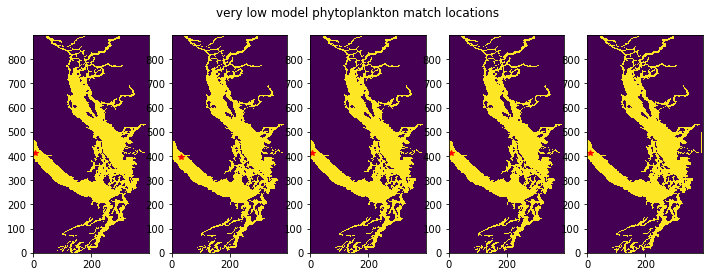

In [21]:
ilen=len(temp)
fig,ax=plt.subplots(1,ilen,figsize=(12,4))
indlist=temp.index
for i in range(0,ilen):
    ax[i].pcolormesh(tmask[0,:,:])
    ax[i].plot(temp.loc[indlist[i],['i']],temp.loc[indlist[i],['j']],'r*')
fig.suptitle('very low model phytoplankton match locations');

## Multiple Linear Regression

#### Diatoms

In [22]:
ii=(~pd.isnull(data['mod_diatoms']))&(~pd.isnull(data['Diatoms-1']))&(~pd.isnull(data['Diatoms-2']))&(~pd.isnull(data['Cyanobacteria']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Prasinophytes']))&(~pd.isnull(data['Haptophytes']))&\
        (~pd.isnull(data['Dictyochophytes']))&(~pd.isnull(data['Dinoflagellates']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Diatoms-2'],data.loc[ii]['Cyanobacteria'],data.loc[ii]['Cryptophytes'],
               data.loc[ii]['Prasinophytes'],data.loc[ii]['Haptophytes'],data.loc[ii]['Dictyochophytes'],data.loc[ii]['Dinoflagellates'],
             data.loc[ii]['Raphidophytes'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_diatoms']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [23]:
m

array([ 0.1461116 ,  0.02313048, -2.31397206,  1.47826858, -0.81415547,
       -0.04395027, -0.24189496, -0.1524798 ,  0.14179773,  0.55578246])

In [24]:
clist=('Diatoms-1','Diatoms-2','Cyanobacteria','Cryptophytes','Prasinophytes','Haptophytes',
        'Dictyochophytes','Dinoflagellates','Raphidophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.1461115991821778
Diatoms-2 0.023130477809363337
Cyanobacteria -2.3139720559151065
Cryptophytes 1.4782685761125942
Prasinophytes -0.8141554674932009
Haptophytes -0.04395026758078864
Dictyochophytes -0.24189495781938905
Dinoflagellates -0.1524798022794198
Raphidophytes 0.1417977308016623
ones 0.5557824554075593


In [25]:
ii=(~pd.isnull(data['mod_diatoms']))&(~pd.isnull(data['Diatoms-1']))&(~pd.isnull(data['Diatoms-2']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Diatoms-2'],data.loc[ii]['Cryptophytes'],
            data.loc[ii]['Raphidophytes'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_diatoms']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [26]:
clist=('Diatoms-1','Diatoms-2','Cryptophytes','Raphidophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.15610851304121548
Diatoms-2 -0.022104283973487515
Cryptophytes 0.3821125404573701
Raphidophytes 0.09267246105179777
ones 0.5044504026229967


In [27]:
ii=(~pd.isnull(data['mod_diatoms']))&(~pd.isnull(data['Diatoms-1']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Cryptophytes'],
            data.loc[ii]['Raphidophytes'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_diatoms']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [28]:
clist=('Diatoms-1','Cryptophytes','Raphidophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.15594754152703202
Cryptophytes 0.3784930664990568
Raphidophytes 0.09178847050301298
ones 0.5004773386944285


#### flagellates

In [29]:
ii=(~pd.isnull(data['mod_flagellates']))&(~pd.isnull(data['Diatoms-1']))&(~pd.isnull(data['Diatoms-2']))&(~pd.isnull(data['Cyanobacteria']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Prasinophytes']))&(~pd.isnull(data['Haptophytes']))&\
        (~pd.isnull(data['Dictyochophytes']))&(~pd.isnull(data['Dinoflagellates']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Diatoms-2'],data.loc[ii]['Cyanobacteria'],data.loc[ii]['Cryptophytes'],
               data.loc[ii]['Prasinophytes'],data.loc[ii]['Haptophytes'],data.loc[ii]['Dictyochophytes'],data.loc[ii]['Dinoflagellates'],
             data.loc[ii]['Raphidophytes'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_flagellates']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [30]:
m

array([ 0.010958  , -0.06728288,  1.5784138 ,  0.55221973,  0.18442328,
        0.25904224,  0.13220077,  0.09301702, -0.03950114,  0.67295675])

In [31]:
clist=('Diatoms-1','Diatoms-2','Cyanobacteria','Cryptophytes','Prasinophytes','Haptophytes',
        'Dictyochophytes','Dinoflagellates','Raphidophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.01095799512224545
Diatoms-2 -0.06728287798013483
Cyanobacteria 1.5784138039580469
Cryptophytes 0.5522197277604812
Prasinophytes 0.18442328222794738
Haptophytes 0.2590422439445318
Dictyochophytes 0.1322007692040354
Dinoflagellates 0.09301702371658432
Raphidophytes -0.039501139563166754
ones 0.6729567467865272


In [32]:
ii=(~pd.isnull(data['mod_flagellates']))&(~pd.isnull(data['Diatoms-1']))&(~pd.isnull(data['Cyanobacteria']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Prasinophytes']))&(~pd.isnull(data['Haptophytes']))&\
        (~pd.isnull(data['Dictyochophytes']))&(~pd.isnull(data['Dinoflagellates']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Cyanobacteria'],data.loc[ii]['Cryptophytes'],
               data.loc[ii]['Prasinophytes'],data.loc[ii]['Haptophytes'],data.loc[ii]['Dictyochophytes'],
             data.loc[ii]['Dinoflagellates'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_flagellates']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [33]:
clist=('Diatoms-1','Cyanobacteria','Cryptophytes','Prasinophytes','Haptophytes',
        'Dictyochophytes','Dinoflagellates','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.005088551793469988
Cyanobacteria 0.8863588722238661
Cryptophytes 0.5998504352492076
Prasinophytes 0.2027439073948646
Haptophytes 0.2818416587510592
Dictyochophytes 0.06190338602397167
Dinoflagellates 0.01833498721034124
ones 0.6702256702362863


In [34]:
ii=(~pd.isnull(data['mod_flagellates']))&(~pd.isnull(data['Cyanobacteria']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Prasinophytes']))&(~pd.isnull(data['Haptophytes']))&\
        (~pd.isnull(data['Dictyochophytes']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Cyanobacteria'],data.loc[ii]['Cryptophytes'],
               data.loc[ii]['Prasinophytes'],data.loc[ii]['Haptophytes'],data.loc[ii]['Dictyochophytes'],
             np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_flagellates']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [35]:
clist=('Cyanobacteria','Cryptophytes','Prasinophytes','Haptophytes',
        'Dictyochophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Cyanobacteria 0.9248939785743201
Cryptophytes 0.592769155988474
Prasinophytes 0.18975008147644779
Haptophytes 0.2794204846195845
Dictyochophytes 0.058845777018170356
ones 0.688074260106763


#### M. rubrum

In [36]:
ii=(~pd.isnull(data['mod_ciliates']))&(~pd.isnull(data['Diatoms-1']))&(~pd.isnull(data['Diatoms-2']))&(~pd.isnull(data['Cyanobacteria']))&\
        (~pd.isnull(data['Cryptophytes']))&(~pd.isnull(data['Prasinophytes']))&(~pd.isnull(data['Haptophytes']))&\
        (~pd.isnull(data['Dictyochophytes']))&(~pd.isnull(data['Dinoflagellates']))&(~pd.isnull(data['Raphidophytes']))
A=np.vstack([data.loc[ii]['Diatoms-1'],data.loc[ii]['Diatoms-2'],data.loc[ii]['Cyanobacteria'],data.loc[ii]['Cryptophytes'],
               data.loc[ii]['Prasinophytes'],data.loc[ii]['Haptophytes'],data.loc[ii]['Dictyochophytes'],data.loc[ii]['Dinoflagellates'],
             data.loc[ii]['Raphidophytes'],np.ones(np.shape(data.loc[ii]['Diatoms-1']))]).T
b=data.loc[ii]['mod_ciliates']
m=np.linalg.lstsq(A,b,rcond=None)[0]

In [37]:
clist=('Diatoms-1','Diatoms-2','Cyanobacteria','Cryptophytes','Prasinophytes','Haptophytes',
        'Dictyochophytes','Dinoflagellates','Raphidophytes','ones')
for c, mm in zip(clist,m):
    print(c,mm)

Diatoms-1 0.014525503919068575
Diatoms-2 0.011395505677502693
Cyanobacteria 0.2710109702166438
Cryptophytes 0.005991003225883295
Prasinophytes 0.0018586582284126508
Haptophytes 0.040540304039717506
Dictyochophytes -0.04121046148561792
Dinoflagellates 0.03735938858964069
Raphidophytes -0.007362533398894991
ones 0.29632175969544594


Diatoms:
- Cryptophytes 0.36
- Diatoms-1 0.15
- Raphidophytes 0.09

Flagellates:
- Cyanobacteria 1.45
- Cryptophytes 0.23
- Prasinophytes 0.27
- Haptophytes 0.40
- Dictyochophytes 0.01

M. rubrum:
- Cyanobacteria 0.43

None:
- Diatoms-2
- Dinoflagellates

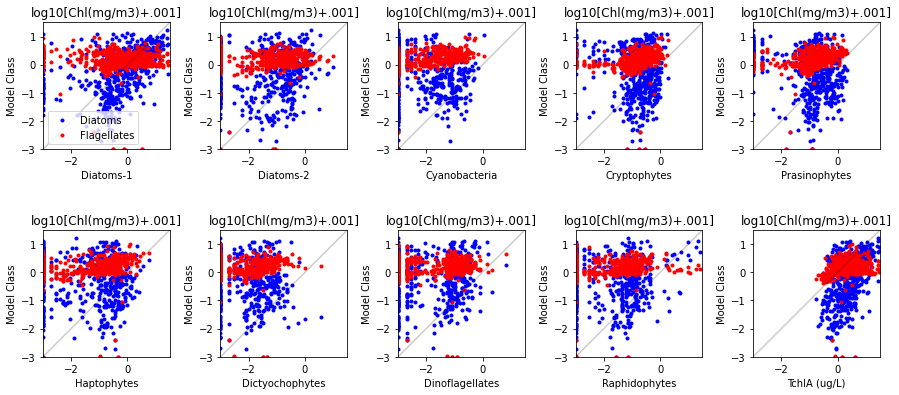

In [38]:
fig,ax=plt.subplots(2,5,figsize=(15,7))
fig.subplots_adjust(wspace=.4)
ax=ax.flatten()

chplc=('Diatoms-1', 'Diatoms-2','Cyanobacteria','Cryptophytes', 'Prasinophytes', 
       'Haptophytes',  'Dictyochophytes','Dinoflagellates','Raphidophytes','TchlA (ug/L)')

mvar1=Chl_N*data['mod_diatoms']
mvar2=Chl_N*data['mod_flagellates']

for ii in range(0,len(chplc)):
    ax[ii].plot(logt(data.loc[:,[chplc[ii]]].values),logt(mvar1),'.',color='blue',label='Diatoms')
    ax[ii].plot(logt(data.loc[:,[chplc[ii]]].values),logt(mvar2),'.',color='red',label='Flagellates')
    ax[ii].set_ylabel('Model Class')
    ax[ii].set_xlabel(chplc[ii])
    ax[ii].set_title('log10[Chl(mg/m3)+.001]')
    ax[ii].plot((-3,1.5),(-3,1.5),'k-',alpha=.2)
    ax[ii].set_xlim((-3,1.5))
    ax[ii].set_ylim((-3,1.5))
    ax[ii].set_aspect(1)
ax[0].legend()


(-3.0, 1.5)

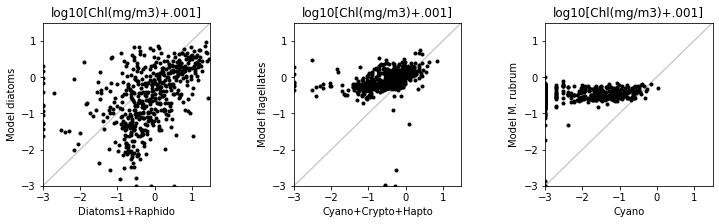

In [39]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
fig.subplots_adjust(wspace=.5)
#ax[0].plot(logt(data['Diatoms-1']+data['Raphidophytes']+.5*data['Cryptophytes']),logt(data['mod_diatoms']),'r.')
ax[0].plot(logt(data['Diatoms-1']+data['Raphidophytes']),logt(data['mod_diatoms']),'k.')
ax[0].set_ylabel('Model diatoms')
ax[0].set_xlabel('Diatoms1+Raphido')
ax[0].set_title('log10[Chl(mg/m3)+.001]')
ax[0].plot((-3,1.5),(-3,1.5),'k-',alpha=.2)
ax[0].set_xlim((-3,1.5))
ax[0].set_ylim((-3,1.5))

ax[1].plot(logt(data['Cyanobacteria']+data['Cryptophytes']+data['Haptophytes']),logt(data['mod_flagellates']),'k.')
ax[1].set_ylabel('Model flagellates')
ax[1].set_xlabel('Cyano+Crypto+Hapto')
ax[1].set_title('log10[Chl(mg/m3)+.001]')
ax[1].plot((-3,1.5),(-3,1.5),'k-',alpha=.2)
ax[1].set_xlim((-3,1.5))
ax[1].set_ylim((-3,1.5))


ax[2].plot(logt(data['Cyanobacteria']),logt(data['mod_ciliates']),'k.')
ax[2].set_ylabel('Model M. rubrum')
ax[2].set_xlabel('Cyano')
ax[2].set_title('log10[Chl(mg/m3)+.001]')
ax[2].plot((-3,1.5),(-3,1.5),'k-',alpha=.2)
ax[2].set_xlim((-3,1.5))
ax[2].set_ylim((-3,1.5))

### Nina says Do not include cyanos in flagellate-like group: they are not flagellates and their abundance is low

In [40]:
data['mod_diatoms_chl']=Chl_N*data['mod_diatoms']
data['mod_flagellates_chl']=Chl_N*data['mod_flagellates']
data['mod_ciliates_chl']=Chl_N*data['mod_ciliates']
data['mod_TChl']=data['mod_diatoms_chl']+data['mod_flagellates_chl']+data['mod_ciliates_chl']
data['CPH']=data['Cryptophytes']+data['Prasinophytes']+data['Haptophytes']
data['DD']=data['Diatoms-1']+data['Diatoms-2']
dfVars=data.loc[:,['Diatoms-1', 'Diatoms-2','Cyanobacteria','Cryptophytes', 'Prasinophytes', 
       'Haptophytes',  'Dictyochophytes','Dinoflagellates','Raphidophytes','DD','CPH','TchlA (ug/L)',
                   'mod_diatoms_chl','mod_flagellates_chl','mod_ciliates_chl','mod_TChl']]

### Variance-Covariance Matrix

In [41]:
dfVars.cov()

,Diatoms-1,Diatoms-2,Cyanobacteria,Cryptophytes,Prasinophytes,Haptophytes,Dictyochophytes,Dinoflagellates,Raphidophytes,DD,CPH,TchlA (ug/L),mod_diatoms_chl,mod_flagellates_chl,mod_ciliates_chl,mod_TChl
Diatoms-1,17.088669,0.181409,-0.027553,-0.219378,-0.272211,-0.188631,-0.037350,0.094977,2.359256,17.270078,-0.680220,18.970444,5.043134,-0.321984,0.398324,5.119474
Diatoms-2,0.181409,0.474147,0.010128,0.013003,0.021991,0.022762,0.026880,0.016666,0.354072,0.655556,0.057756,1.122082,0.100717,-0.010134,0.015788,0.106372
Cyanobacteria,-0.027553,0.010128,0.009374,0.013606,0.022069,0.011891,0.001802,0.004556,0.121201,-0.017425,0.047566,0.166650,-0.014034,0.043923,0.003725,0.033614
Cryptophytes,-0.219378,0.013003,0.013606,0.069615,0.057233,0.044869,0.002417,0.015848,0.081468,-0.206374,0.171716,0.076676,-0.000847,0.139540,0.005187,0.143880
Prasinophytes,-0.272211,0.021991,0.022069,0.057233,0.120558,0.040799,0.007002,0.007663,0.187265,-0.250221,0.218589,0.190104,-0.147586,0.160600,0.005640,0.018654
Haptophytes,-0.188631,0.022762,0.011891,0.044869,0.040799,0.212689,0.001497,0.003169,-0.045714,-0.165869,0.298356,0.101071,-0.069378,0.189013,0.018178,0.137813
Dictyochophytes,-0.037350,0.026880,0.001802,0.002417,0.007002,0.001497,0.030964,0.002842,0.033695,-0.010470,0.010915,0.069551,-0.025783,0.012038,-0.001938,-0.015683
Dinoflagellates,0.094977,0.016666,0.004556,0.015848,0.007663,0.003169,0.002842,0.114819,0.263196,0.111643,0.026680,0.523692,0.071926,0.033823,0.009515,0.115265
Raphidophytes,2.359256,0.354072,0.121201,0.081468,0.187265,-0.045714,0.033695,0.263196,8.091115,2.713328,0.223019,11.441595,2.058529,-0.053503,0.034273,2.039298
DD,17.270078,0.655556,-0.017425,-0.206374,-0.250221,-0.165869,-0.010470,0.111643,2.713328,17.925634,-0.622464,20.092525,5.143851,-0.332118,0.414112,5.225845


### Correlation Coefficient Matrix

In [42]:
dfVars.corr()

,Diatoms-1,Diatoms-2,Cyanobacteria,Cryptophytes,Prasinophytes,Haptophytes,Dictyochophytes,Dinoflagellates,Raphidophytes,DD,CPH,TchlA (ug/L),mod_diatoms_chl,mod_flagellates_chl,mod_ciliates_chl,mod_TChl
Diatoms-1,1.000000,0.063731,-0.068843,-0.201135,-0.189651,-0.098943,-0.051347,0.067805,0.200640,0.986740,-0.198286,0.802607,0.469613,-0.067164,0.392248,0.430586
Diatoms-2,0.063731,1.000000,0.151924,0.071573,0.091978,0.071678,0.221845,0.071426,0.180772,0.224862,0.101074,0.285002,0.056291,-0.012687,0.093315,0.053697
Cyanobacteria,-0.068843,0.151924,1.000000,0.532622,0.656506,0.266305,0.105757,0.138890,0.440098,-0.042509,0.592023,0.301046,-0.055781,0.391063,0.156554,0.120670
Cryptophytes,-0.201135,0.071573,0.532622,1.000000,0.624736,0.368740,0.052058,0.177262,0.108551,-0.184743,0.784255,0.050826,-0.001235,0.455929,0.080002,0.189554
Prasinophytes,-0.189651,0.091978,0.656506,0.624736,1.000000,0.254785,0.114602,0.065129,0.189607,-0.170211,0.758626,0.095758,-0.163579,0.398737,0.066111,0.018675
Haptophytes,-0.098943,0.071678,0.266305,0.368740,0.254785,1.000000,0.018442,0.020279,-0.034848,-0.084948,0.779578,0.038330,-0.057908,0.353399,0.160450,0.103896
Dictyochophytes,-0.051347,0.221845,0.105757,0.052058,0.114602,0.018442,1.000000,0.047658,0.067319,-0.014054,0.074750,0.069128,-0.056385,0.058973,-0.044820,-0.030978
Dinoflagellates,0.067805,0.071426,0.138890,0.177262,0.065129,0.020279,0.047658,1.000000,0.273066,0.077819,0.094879,0.270301,0.081679,0.086040,0.114267,0.118227
Raphidophytes,0.200640,0.180772,0.440098,0.108551,0.189607,-0.034848,0.067319,0.273066,1.000000,0.225300,0.094479,0.703497,0.278473,-0.016213,0.049029,0.249173
DD,0.986740,0.224862,-0.042509,-0.184743,-0.170211,-0.084948,-0.014054,0.077819,0.225300,1.000000,-0.177163,0.829998,0.467636,-0.067635,0.398127,0.429112


### Cov matrix with log transformed values:

In [43]:
dflog=pd.DataFrame()
for el in ['Diatoms-1', 'Diatoms-2','Cyanobacteria','Cryptophytes', 'Prasinophytes', 
       'Haptophytes',  'Dictyochophytes','Dinoflagellates','Raphidophytes','CPH','TchlA (ug/L)',
                   'mod_diatoms_chl','mod_flagellates_chl','mod_ciliates_chl','mod_TChl']:
    dflog[el]=logt(data[el])
dflog.cov()

,Diatoms-1,Diatoms-2,Cyanobacteria,Cryptophytes,Prasinophytes,Haptophytes,Dictyochophytes,Dinoflagellates,Raphidophytes,CPH,TchlA (ug/L),mod_diatoms_chl,mod_flagellates_chl,mod_ciliates_chl,mod_TChl
Diatoms-1,1.143896,0.056499,-0.355166,-0.201235,-0.319583,-0.345067,-0.113694,0.172803,-0.108098,-0.211761,0.260771,0.346662,-0.041995,0.044671,0.077346
Diatoms-2,0.056499,1.252068,0.038452,0.037690,0.058012,0.086532,0.333742,0.219432,0.072434,0.027853,0.082449,0.079207,0.006960,0.021096,0.024322
Cyanobacteria,-0.355166,0.038452,0.787662,0.279866,0.441064,0.361159,0.268237,0.106178,0.400838,0.278662,0.039907,-0.140277,0.141455,0.040641,0.040815
Cryptophytes,-0.201235,0.037690,0.279866,0.457056,0.417703,0.201440,0.190611,0.220589,0.313164,0.299050,0.010702,-0.090242,0.060265,-0.009554,0.000028
Prasinophytes,-0.319583,0.058012,0.441064,0.417703,0.812701,0.242934,0.281955,0.168061,0.461546,0.369091,-0.011221,-0.246706,0.096363,-0.009408,-0.024992
Haptophytes,-0.345067,0.086532,0.361159,0.201440,0.242934,1.179832,0.177061,0.093571,0.190644,0.392108,0.054316,-0.032627,0.093118,0.033194,0.041063
Dictyochophytes,-0.113694,0.333742,0.268237,0.190611,0.281955,0.177061,0.603438,0.207367,0.260694,0.166758,0.034498,-0.072012,0.045673,-0.005506,-0.001612
Dinoflagellates,0.172803,0.219432,0.106178,0.220589,0.168061,0.093571,0.207367,0.979169,0.384626,0.149026,0.156830,0.140414,0.017455,0.008123,0.030022
Raphidophytes,-0.108098,0.072434,0.400838,0.313164,0.461546,0.190644,0.260694,0.384626,1.112382,0.259329,0.088644,-0.031674,0.070968,0.013565,0.033753
CPH,-0.211761,0.027853,0.278662,0.299050,0.369091,0.392108,0.166758,0.149026,0.259329,0.336208,0.029540,-0.056154,0.062776,0.007730,0.015984


### Corr Coeff matrix with log transformed values:

In [44]:
dflog.corr()

,Diatoms-1,Diatoms-2,Cyanobacteria,Cryptophytes,Prasinophytes,Haptophytes,Dictyochophytes,Dinoflagellates,Raphidophytes,CPH,TchlA (ug/L),mod_diatoms_chl,mod_flagellates_chl,mod_ciliates_chl,mod_TChl
Diatoms-1,1.000000,0.047210,-0.374169,-0.278308,-0.331455,-0.297030,-0.136844,0.163278,-0.095829,-0.341467,0.541200,0.385234,-0.108036,0.138508,0.178481
Diatoms-2,0.047210,1.000000,0.038720,0.049823,0.057510,0.071196,0.383955,0.198179,0.061376,0.042930,0.163554,0.084199,0.017127,0.062572,0.053687
Cyanobacteria,-0.374169,0.038720,1.000000,0.466440,0.551272,0.374643,0.389074,0.120903,0.428225,0.541507,0.099810,-0.187759,0.438313,0.151781,0.113442
Cryptophytes,-0.278308,0.049823,0.466440,1.000000,0.685359,0.274316,0.362950,0.329739,0.439197,0.762878,0.035138,-0.158559,0.245130,-0.046837,0.000101
Prasinophytes,-0.331455,0.057510,0.551272,0.685359,1.000000,0.248092,0.402622,0.188397,0.485426,0.706096,-0.027628,-0.324968,0.293846,-0.034576,-0.068360
Haptophytes,-0.297030,0.071196,0.374643,0.274316,0.248092,1.000000,0.209844,0.087056,0.166413,0.622575,0.110997,-0.035701,0.235880,0.101346,0.093303
Dictyochophytes,-0.136844,0.383955,0.389074,0.362950,0.402622,0.209844,1.000000,0.269770,0.318191,0.370226,0.098576,-0.110214,0.161826,-0.023514,-0.005124
Dinoflagellates,0.163278,0.198179,0.120903,0.329739,0.188397,0.087056,0.269770,1.000000,0.368539,0.259734,0.351797,0.168612,0.048522,0.027215,0.074861
Raphidophytes,-0.095829,0.061376,0.428225,0.439197,0.485426,0.166413,0.318191,0.368539,1.000000,0.424053,0.186557,-0.035728,0.185320,0.042693,0.079059
CPH,-0.341467,0.042930,0.541507,0.762878,0.706096,0.622575,0.370226,0.259734,0.424053,1.000000,0.113082,-0.115043,0.297727,0.044189,0.068000


### New groups Model-Obs Comparison:

Text(0.5, 0.98, 'old')

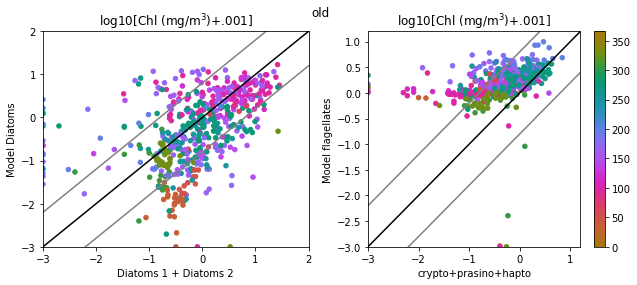

In [60]:
thresh=.8
msize=20
fig,ax=plt.subplots(1,2,figsize=(9,4))
m=ax[0].scatter(logt(data['DD']),logt(data['mod_diatoms_chl']),
          c=data['yd'],s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
m=ax[1].scatter(logt(data['CPH']),logt(data['mod_flagellates_chl']),
          c=data['yd'],s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[0].set_xlim(-3,2)
ax[0].set_ylim(-3,2)
ax[1].set_xlim(-3,1.2)
ax[1].set_ylim(-3,1.2)
ax[0].set_xlabel('Diatoms 1 + Diatoms 2')
ax[0].set_ylabel('Model Diatoms')
ax[0].set_title('log10[Chl (mg/m$^3$)+.001]')
ax[1].set_xlabel('crypto+prasino+hapto')
ax[1].set_ylabel('Model flagellates')
ax[1].set_title('log10[Chl (mg/m$^3$)+.001]')
ax[0].plot((-3,2),(-3+thresh,2+thresh),'-',color='grey')
ax[0].plot((-3,2),(-3-thresh,2-thresh),'-',color='grey')
ax[1].plot((-3,2),(-3+thresh,2+thresh),'-',color='grey')
ax[1].plot((-3,2),(-3-thresh,2-thresh),'-',color='grey')
ax[0].plot((-3,2),(-3,2),'k-')
ax[1].plot((-3,1.2),(-3,1.2),'k-')
plt.tight_layout()
fig.colorbar(m,ax=ax[1])
fig.suptitle('old')

Text(0.5, 0.98, 'old')

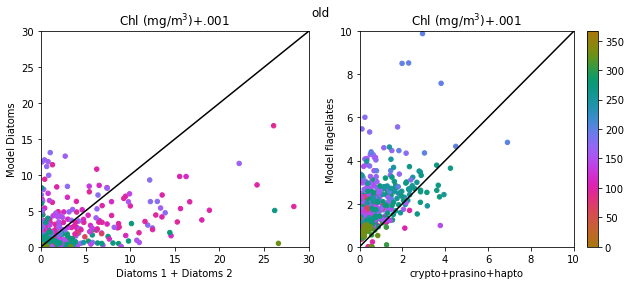

In [61]:
thresh=.8
msize=20
fig,ax=plt.subplots(1,2,figsize=(9,4))
m=ax[0].scatter(data['DD'],data['mod_diatoms_chl'],
          c=data['yd'],s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
m=ax[1].scatter(data['CPH'],data['mod_flagellates_chl'],
          c=data['yd'],s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[0].set_xlim(0,30)
ax[0].set_ylim(0,30)
ax[1].set_xlim(0,10)
ax[1].set_ylim(0,10)
ax[0].set_xlabel('Diatoms 1 + Diatoms 2')
ax[0].set_ylabel('Model Diatoms')
ax[0].set_title('Chl (mg/m$^3$)+.001')
ax[1].set_xlabel('crypto+prasino+hapto')
ax[1].set_ylabel('Model flagellates')
ax[1].set_title('Chl (mg/m$^3$)+.001')
ax[0].plot((0,30),(0,30),'k-')
ax[1].plot((0,10),(0,10),'k-')
plt.tight_layout()
fig.colorbar(m,ax=ax[1])
fig.suptitle('old')

In [47]:
ii=(data['DD']>=0)&(data['mod_diatoms_chl']>=0)
slope, intercept, r_value, p_value, std_err = spst.linregress(data.loc[ii]['DD'],
                                                              data.loc[ii]['mod_diatoms_chl'])

In [48]:
slope, intercept, r_value*r_value

(0.286558433589653, 1.0619623445361692, 0.21868341139647007)

In [49]:
ii=(data['CPH']>=0)&(data['mod_flagellates_chl']>=0)
slope, intercept, r_value, p_value, std_err = spst.linregress(data.loc[ii]['CPH'],
                                                              data.loc[ii]['mod_flagellates_chl'])

In [50]:
slope, intercept, r_value*r_value

(0.7090390612453443, 1.2608581414674351, 0.2581949489908788)

In [51]:
ii=(data['DD']>=0)&(data['mod_diatoms_chl']>=0)
slope, intercept, r_value, p_value, std_err = spst.linregress(logt(data.loc[ii]['DD']),
                                                              logt(data.loc[ii]['mod_diatoms_chl']))

In [52]:
slope, intercept, r_value*r_value

(0.412612207492385, -0.24060926513650613, 0.17789955744163427)

Diatoms/DD


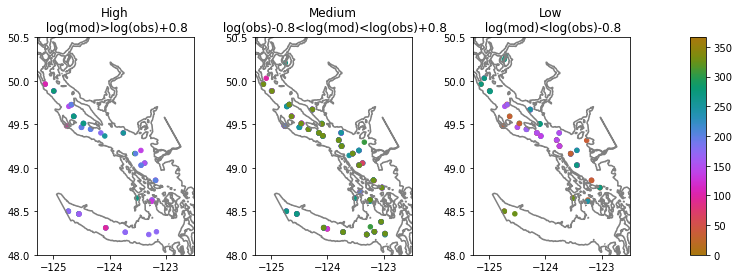

In [53]:
print('Diatoms/DD')
fig,ax=plt.subplots(1,4,figsize=(12,4),gridspec_kw={'width_ratios': [1,1,1,.1],'wspace':.5},)
for iax in ax[0:3]:
    iax.contour(navlon,navlat,tmask[0,:,:],levels=[0.5,],colors='gray')
    iax.set_xlim(-125.3,-122.5)
    iax.set_ylim(48,50.5)
ihi=logt(data['mod_diatoms_chl'])>(logt(data['DD'])+thresh)
ilo=logt(data['mod_diatoms_chl'])<(logt(data['DD'])-thresh)
idata=data.loc[(data.DD>=0)&ihi]
ax[0].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[0].set_title('High\n log(mod)>log(obs)+'+str(thresh))
idata=data.loc[(data.DD>=0)&(~ihi)&(~ilo)]
ax[1].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[1].set_title('Medium\n log(obs)-'+str(thresh)+'<log(mod)<log(obs)+'+str(thresh))
idata=data.loc[(data.DD>=0)&ilo]
m=ax[2].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[2].set_title('Low\n log(mod)<log(obs)-'+str(thresh));
fig.colorbar(m,cax=ax[3]);

Flagellates/CPH


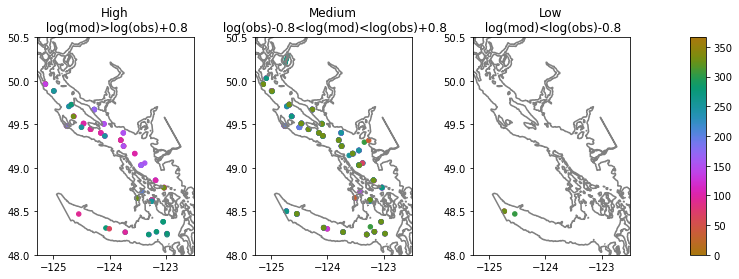

In [54]:
print('Flagellates/CPH')
fig,ax=plt.subplots(1,4,figsize=(12,4),gridspec_kw={'width_ratios': [1,1,1,.1],'wspace':.5},)
for iax in ax[0:3]:
    iax.contour(navlon,navlat,tmask[0,:,:],levels=[0.5,],colors='gray')
    iax.set_xlim(-125.3,-122.5)
    iax.set_ylim(48,50.5)
ihi=logt(data['mod_flagellates_chl'])>(logt(data['CPH'])+thresh)
ilo=logt(data['mod_flagellates_chl'])<(logt(data['CPH'])-thresh)
idata=data.loc[(data.CPH>=0)&ihi]
ax[0].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[0].set_title('High\n log(mod)>log(obs)+'+str(thresh))
idata=data.loc[(data.CPH>=0)&(~ihi)&(~ilo)]
ax[1].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[1].set_title('Medium\n log(obs)-'+str(thresh)+'<log(mod)<log(obs)+'+str(thresh))
idata=data.loc[(data.CPH>=0)&ilo]
m=ax[2].scatter(idata.Lon,idata.Lat,c=idata.yd,s=msize,cmap=cmocean.cm.phase,vmin=0,vmax=366)
ax[2].set_title('Low\n log(mod)<log(obs)-'+str(thresh));
fig.colorbar(m,cax=ax[3]);

### Diatom fraction

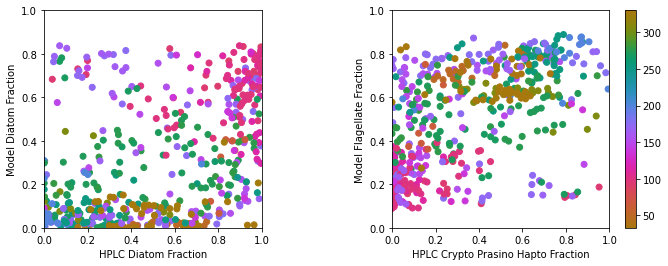

In [55]:
fig,ax=plt.subplots(1,2,figsize=(12,4))
diatFracMod=data['mod_diatoms']/(data['mod_diatoms']+data['mod_flagellates']+data['mod_ciliates'])
diatFracObs=data['DD']/data['TchlA (ug/L)']
m=ax[0].scatter(diatFracObs,diatFracMod,
          c=data['yd'],cmap=cmocean.cm.phase)
ax[0].set_xlabel('HPLC Diatom Fraction')
ax[0].set_ylabel('Model Diatom Fraction')
ax[0].set_xlim((0,1))
ax[0].set_ylim((0,1))
flFracMod=data['mod_flagellates']/(data['mod_diatoms']+data['mod_flagellates']+data['mod_ciliates'])
CPHFracObs=data['CPH']/data['TchlA (ug/L)']
m=ax[1].scatter(CPHFracObs,flFracMod,
          c=data['yd'],cmap=cmocean.cm.phase)
ax[1].set_xlabel('HPLC Crypto Prasino Hapto Fraction')
ax[1].set_ylabel('Model Flagellate Fraction')
ax[1].set_xlim((0,1))
ax[1].set_ylim((0,1))
ax[0].set_aspect(1)
ax[1].set_aspect(1)

fig.colorbar(m)

In [56]:
#Reminder:
np.random.seed(42)
df = pd.DataFrame(np.random.randn(1000, 4),columns=['a', 'b', 'c','d'])
df['a+b+c']=.2*df['a']+.3*df['b']+.45*df['c']

In [57]:
df.cov()

,a,b,c,d,a+b+c
a,0.929140,0.007946,-0.037053,-0.022301,0.171538
b,0.007946,1.023910,-0.032939,0.004689,0.293940
c,-0.037053,-0.032939,1.012188,0.034186,0.438192
d,-0.022301,0.004689,0.034186,1.013977,0.012330
a+b+c,0.171538,0.293940,0.438192,0.012330,0.319676


In [58]:
df.corr()

,a,b,c,d,a+b+c
a,1.000000,0.008146,-0.038208,-0.022976,0.314749
b,0.008146,1.000000,-0.032355,0.004602,0.513774
c,-0.038208,-0.032355,1.000000,0.033745,0.770334
d,-0.022976,0.004602,0.033745,1.000000,0.021657
a+b+c,0.314749,0.513774,0.770334,0.021657,1.000000


In [59]:
A=np.vstack([df['a'],df['b'],df['c'],df['d'],np.ones(np.shape(df['a']))]).T
b=df['a+b+c']
m=np.linalg.lstsq(A,b,rcond=None)[0]
print(m)

[ 2.00000000e-01  3.00000000e-01  4.50000000e-01  1.59594560e-16
 -1.00613962e-16]
